### 导入模块


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy import linalg as la
import sympy
sympy.init_printing()
from scipy import optimize


In [ ]:
import pandas as pd
data= pd.read_csv('/Users/zhy/Desktop/WorldIndex.csv')
datanew=data.dropna()#删除缺失值
datanew

### 绘制人均寿命数据的直方图


In [ ]:
max1=max(datanew.Life_expectancy)
max1

In [26]:
min1=min(datanew.Life_expectancy)
min1

In [27]:
range1=max1-min1
range1

Text(0, 0.5, 'Number')

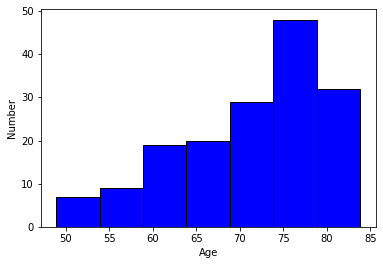

In [28]:

plt.hist(x = datanew.Life_expectancy, # 指定绘图数据
bins = 7, # 指定直方图中条块的个数
color = 'blue', # 指定直方图的填充色
edgecolor = 'black')
plt.xlabel('Age')
plt.ylabel('Number')


### 绘制人均GDP直方图


In [29]:
max2=max(datanew.GDP_per_capita)
max2

In [30]:
min2=min(datanew.GDP_per_capita)
min2

In [31]:
range2=max2-min2
range2

Text(0.5, 1.0, 'National GDP per capita')

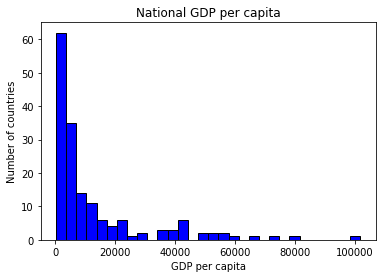

In [32]:
plt.hist(x = datanew.GDP_per_capita, # 指定绘图数据
bins = 30, # 指定直方图中条块的个数
color = 'blue', # 指定直方图的填充色
edgecolor = 'black')
plt.xlabel('GDP per capita')
plt.ylabel('Number of countries')
plt.title('National GDP per capita')

### 绘制人均寿命箱线图


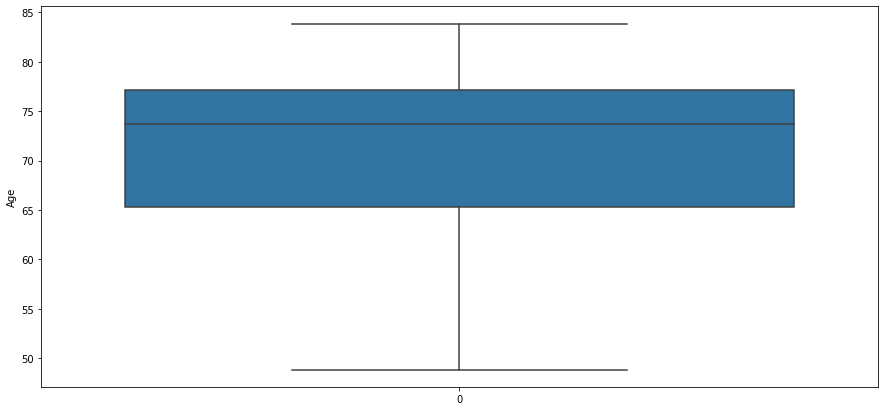

In [33]:

import seaborn as sns
plt.figure(figsize=(15,7))
sns.boxplot(data=datanew.Life_expectancy,orient='r')
plt.ylabel('Age')
plt.show()

### 绘制每个大洲的国家个数条形图


In [34]:
con_number = datanew.Continent.value_counts()
con_number

Africa           48
Europe           41
Asia             36
North America    19
South America    11
Oceania           9
Name: Continent, dtype: int64

In [39]:
con_name = list(con_number.index)
con_name

['Africa', 'Europe', 'Asia', 'North America', 'South America', 'Oceania']

In [40]:
con_arange = np.arange(len(con_name))
con_arange

array([0, 1, 2, 3, 4, 5])

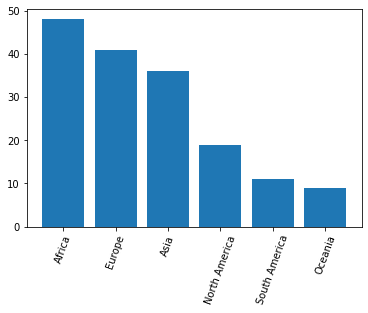

In [41]:
plt.bar(con_arange, con_number)
# 设置横坐标
plt.xticks(con_arange, con_name, rotation=70)   # rotation 旋转横坐标标签
plt.show()

### 绘制各大洲国家数量占比的饼图


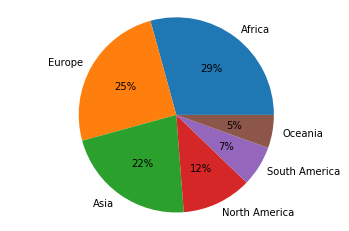

In [42]:
plt.pie(con_number, labels=con_name, autopct='%1.f%%')  # autopct 显示占比
plt.axis('equal')  # 调整坐标轴的比例
plt.show()

### 绘制人均寿命和人均GDP的关系（散点）


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


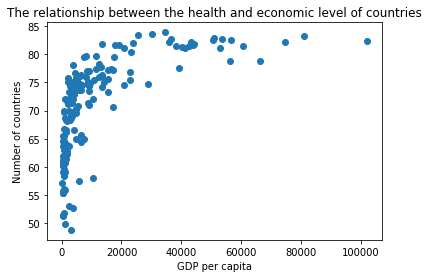

In [43]:

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签 
plt.scatter(datanew.GDP_per_capita, datanew.Life_expectancy)

plt.xlabel('GDP per capita')
plt.ylabel('Number of countries')
plt.title('National GDP per capita')
plt.title('The relationship between the health and economic level of countries')  # 图标题
plt.show()

### 绘制人均寿命和人均GDP的关系（散点）


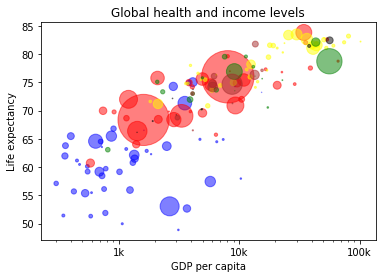

In [44]:

map_dict = {      
    'Asia':'red',
    'Europe':'yellow',
    'Africa':'blue',
    'North America':'green',
    'South America':'brown',
    'Oceania':'black'
}
colors = datanew.Continent.map(map_dict)   # 将国家按所在州对于不同的颜色

size = datanew.Population/ 1e6 * 2  # 数据点大小，正比于人口数
plt.scatter(x=datanew.GDP_per_capita, y=datanew.Life_expectancy, s=size,c=colors, alpha=0.5)  # 参数s设置点的大小
plt.xscale('log')
plt.xlabel('GDP per capita')
plt.ylabel('Life expectancy')
plt.title('Global health and income levels')

tick_val = [1000,10000,100000]
tick_lab = ['1k','10k','100k']
plt.xticks(tick_val, tick_lab)
plt.show()

$$
f(x)=2*sin(x)-x+1
$$


In [2]:

import sympy
from sympy import *

x = sympy.Symbol("x")
A = 2
B = 1
b=sympy.nsolve(A * sympy.sin(x) - x+B,0)
print(b)

2.38006127313934


$$
3 x_1 + 2 x_2 = 3
$$

$$
x_1 - 2 x_2 = 5
$$

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


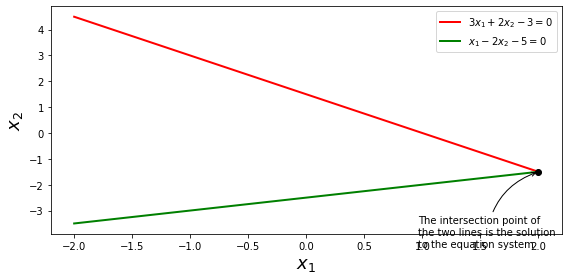

In [45]:


fig, ax = plt.subplots(figsize=(8, 4))
x1 = np.linspace(-2, 2, 100)

x2_1 = (3 - 3 * x1)/2
x2_2 = (x1-5)/2

ax.plot(x1, x2_1, 'r', lw=2, label=r"$3x_1+2x_2-3=0$")
ax.plot(x1, x2_2, 'g', lw=2, label=r"$x_1-2x_2-5=0$")

A = np.array([[3, 2], [1, -2]])
b = np.array([3, 5])
x = la.solve(A, b)

ax.plot(x[0], x[1], 'ko', lw=2)
ax.annotate("The intersection point of\nthe two lines is the solution\nto the equation system",
            xy=(x[0], x[1]), xycoords='data',
            xytext=(-120, -75), textcoords='offset points', 
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3, rad=-.3"))

ax.set_xlabel(r"$x_1$", fontsize=18)
ax.set_ylabel(r"$x_2$", fontsize=18)
ax.legend();

fig.tight_layout()

### Symbolic approach

In [2]:
A = sympy.Matrix([[3, 2], [1, -2]])
b = sympy.Matrix([3, 5])

In [3]:
A.rank()

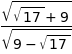

In [4]:
A.condition_number()

In [5]:
sympy.N(_)

In [6]:
A.norm()

In [7]:
L, U, _ = A.LUdecomposition()

In [8]:
L

⎡ 1   0⎤
⎢      ⎥
⎣1/3  1⎦

In [9]:
U

⎡3   2  ⎤
⎢       ⎥
⎣0  -8/3⎦

In [10]:
L * U

⎡3  2 ⎤
⎢     ⎥
⎣1  -2⎦

In [11]:
x = A.solve(b)
x

⎡ 2  ⎤
⎢    ⎥
⎣-3/2⎦

### Numerical approach

In [12]:
A = np.array([[3, 2], [1, -2]])
b = np.array([3, 5])

In [13]:
np.linalg.matrix_rank(A)

2

In [14]:
np.linalg.cond(A)

In [15]:
np.linalg.norm(A)

In [16]:
P, L, U = la.lu(A)

In [17]:
L

array([[1.        , 0.        ],
       [0.33333333, 1.        ]])

In [18]:
U

array([[ 3.        ,  2.        ],
       [ 0.        , -2.66666667]])

In [28]:
L*U

array([[ 3.        ,  0.        ],
       [ 0.        , -2.66666667]])

In [29]:
la.solve(A, b)

array([ 2. , -1.5])